In [25]:
import umap
import sys
import glob
import natsort
import pandas as pd
import numpy as np
import random

## Usage: python umap_s1 <dataset_dir> <n_neigh>
## Ex: python umap_s1 ./Datasets/gaussians 15
if __name__ == '__main__':
	dataset_dir = '../Datasets/walk'
# 	n_neigh = float(sys.argv[2])
	# print(dataset_dir, perplexity)
	n_neigh = 15
	Xs = []
	y = []
	n_revisions = 0
	if 'quickdraw' in dataset_dir or 'fashion' in dataset_dir or 'faces' in dataset_dir:
		X, info_df, n_revisions, CATEGORIES = Shared.load_drawings(dataset_dir + '/')
		N = len(X)
		X_flat = np.reshape(np.ravel(X), (N, -1))
		for t, df in info_df.groupby('t'):
			df = df.sort_values(['drawing_cat_id', 'drawing_id'])
			if len(y) == 0:
				y = df['drawing_cat_str'].str.cat(df['drawing_id'].astype(str), sep='-')
			Xs.append(X_flat[df.X_index])
	else:
		csvs = natsort.natsorted(glob.glob(dataset_dir + '/*'))
		n_revisions = len(csvs)
		for csv in csvs:
			df = pd.read_csv(csv, index_col=0)
			if len(y) == 0:
				y = df.index
			Xs.append(df.values)

In [26]:
columns = ['id']
df_out = pd.DataFrame(index=y)
for t, X in enumerate(Xs):
    print(t, end=' ')
    sys.stdout.flush()
    random_state = random.randint(0, 100)
    # Reduced number of epochs and sigma_iters. Previous were 1000 and 50.
    Y = umap.UMAP(n_neighbors=n_neigh).fit_transform(X)
    print(Y)
    df_out['t{}d0'.format(t)] = Y[:,0]
    df_out['t{}d1'.format(t)] = Y[:,1]
    break

0 

/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


[[ 8.076808   -5.7930374 ]
 [ 5.801734   -5.8971744 ]
 [ 9.830178   -6.604627  ]
 [ 8.548377   -5.883615  ]
 [ 7.9655905  -5.899116  ]
 [ 9.382442   -6.384781  ]
 [ 6.9906244  -5.744563  ]
 [11.191973   -7.106529  ]
 [ 6.8023257  -5.5009394 ]
 [ 6.0732737  -5.653254  ]
 [ 6.3990703  -5.5974927 ]
 [ 8.162521   -5.839112  ]
 [ 5.852441   -5.7004423 ]
 [ 8.033989   -5.9845552 ]
 [ 6.5633907  -5.7045712 ]
 [ 8.205806   -5.8883705 ]
 [ 7.0439653  -5.8289595 ]
 [11.261881   -7.180829  ]
 [ 5.6404815  -5.8711395 ]
 [10.9612     -6.901602  ]
 [10.992124   -6.8789706 ]
 [ 6.6833434  -5.896803  ]
 [ 9.89691    -6.422496  ]
 [ 8.394609   -5.9907613 ]
 [ 7.880271   -5.9582267 ]
 [ 8.829666   -6.213999  ]
 [ 5.478415   -5.9157457 ]
 [ 9.710092   -6.354451  ]
 [10.977066   -6.9615808 ]
 [ 7.804247   -5.8321066 ]
 [10.787031   -7.021876  ]
 [ 7.242815   -5.728401  ]
 [ 9.537372   -6.6027436 ]
 [ 9.55113    -6.289881  ]
 [ 4.7805023  -7.901062  ]
 [ 6.074435   -5.738682  ]
 [ 9.068102   -6.1543937 ]
 

In [27]:
df_out

,t0d0,t0d1
id,,
c0-0,8.076808,-5.793037
c0-1,5.801734,-5.897174
c0-2,9.830178,-6.604627
c0-3,8.548377,-5.883615
c0-4,7.965590,-5.899116
c0-5,9.382442,-6.384781
c0-6,6.990624,-5.744563
c0-7,11.191973,-7.106529
c0-8,6.802326,-5.500939


In [23]:
plt.scatter(df_out[:, 0], df_out[:, 1])


NameError: name 'plt' is not defined

In [6]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
# sns.pairplot(iris_df, hue='species');

In [7]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(iris.data)
embedding.shape

/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 2)

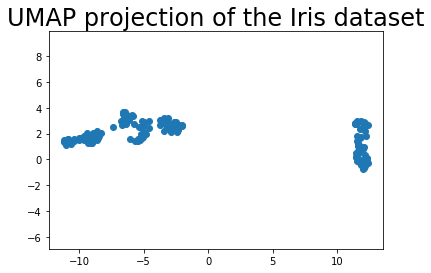

In [9]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);